# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 10</span>

### Exercise 10.1

Choose **ONLY ONE** of the two following possibilities:

1. Parallelize with MPI libraries your Genetic Algorithm code in order to solve the TSP by performing a *Genetic Search* with (up to) 10 **parallel GA searches of the optimal path**:
each node should perform an independent GA search, the so-called *Continent*, **but** every $N_{migr}$ generations the *Continents* should exchange their best individuals randomly.

2. Starting from your Genetic Algorithm code implement a **Parallel Tempering algorithm** (Simulated Annealing with many temperatures). Parallelize with MPI libraries your algorithm in order to solve the TSP where each computing node, up to 10, is characterized by a different temperature or a limited set of temperatures (if you need more than 10 temperatures). Use your genetic operators (except crossover) as trial moves for the Metropolis algorithm and **add a trial move that proposes an exchange of paths among adjacent temperatures (nodes)** (see lecture 8 for the acceptance formula). The candidate solution of the TSP will appear on the node with the lower temperature.

### Esercizio 10.1 - Soluzione proposta

Si è scelto di svolgere l'esercizio proposto nella modalità $(1)$, sfruttando l'algoritmo genetico descritto nell'**Esercizio 09.1** per $2000$ generazioni di $500$ individui e facendo svolgere parallelamente la ricerca a $8$ nodi, denominati _continenti_.

#### Ricerca parallela senza migrazione

Si è in primo luogo effettuata la ricerca senza migrazione tra i continenti, ossia senza scambio dell'individuo migliore trovato da ciascun nodo. 

Tale processo è eseguito in modo analogo a quanto fatto nell'**Esercizio 09.1**, ma fornisce in _output_ $8$ percorsi ottimali, dai quali poi è estratto l'individuo che risulta complessivamente migliore. 

Gli unici metodi della libreria _MPI_ che sono stati utilizzati sono dunque:
- _MPI_Init( )_, che l'ambiente _MPI_;
- _MPI_Comm_size( )_, che restituisce il numero di processi paralleli;
- _MPI_Comm_rank( )_, che restituisce l'indice in $[0, \mathrm{size} - 1]$ del processo effettuato;
- _MPI_Gather( )_, che comunica gli $8$ migliori percorsi ottenuti a un singolo ricevitore;
- _MPI_Finalize( )_, che termina il _Message Passing_.

#### Ricerca parallela con migrazione

Si è successivamente inserita anche una migrazione, generando pseudocasualmente un ordine di scambio degli individui migliori, in cui il continente di posizione $j$ manda al $(j+1)$-esimo il proprio percorso ottimale e lo riceve dal $(j-1)$-esimo. Anche in tale processo si sono ottenuti $8$ percorsi ottimali, da cui è stato estratto il migliore.

Oltre ai metodi già riportati per la ricerca senza migrazione, si sono anche impiegati:
- _MPI_Isend( )_, che manda al continente di indice $(j+1)$ il miglior percorso ottenuto dal $j$-esimo;
- _MPI_Irecv( )_, che riceve dal continente di indice $(j-1)$ il miglior percorso e lo comunica al $j$-esimo;
- _MPI_Wait( )_, che impone di aspettare che le copie dei _buffer_ necessarie a effettuare i _send_ e i _receive_ siano completate prima di proseguire con la routine. 

La migrazione è stata effettuata ogni $10$ generazioni.

### Exercise 10.2

Apply your parallel code to the TSP problem for 50 american state-capitals longitude and latitude coordinates in the *American_capitals.dat* file.

If your choice in Exercise 10.1 is option 1, do you improve with respect using the same number of computing cores but with **independent GA searches** ?

If your choice in Exercise 10.1 is option 2, by using a number of temperatures equal to the number of individuals in your **non-parallel Genetic Algorithm code**, do you "improve" with respect to it?

### Esercizio 10.2 - Soluzione proposta

Sono in seguito riportati i grafici dei percorsi ottimali e delle lunghezze $\langle L^{(1)} \rangle$ mediate sulla migliore metà della popolazione, sia per la ricerca con migrazione, sia per quella senza.

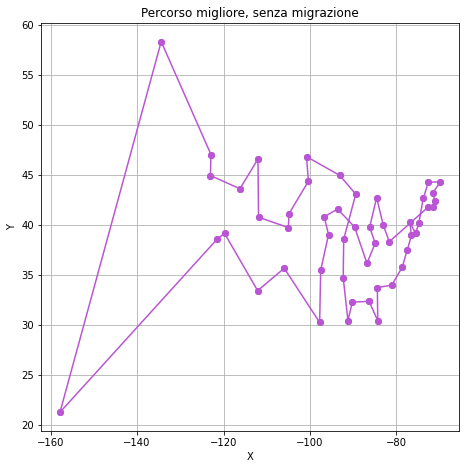


La lunghezza del percorso ottimale ottenuto senza migrazione risulta essere:
- $ L^{(1)}$ = 275.503


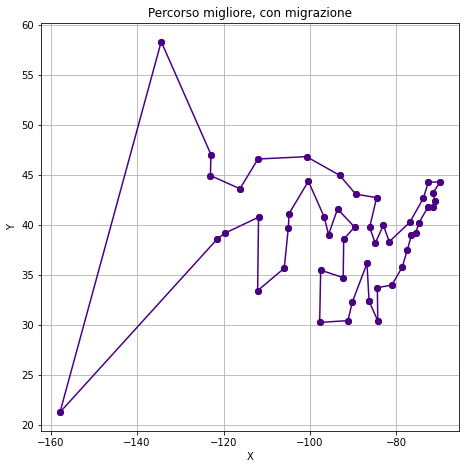


La lunghezza del percorso ottimale ottenuto con migrazione risulta essere:
- $ L^{(1)}$ = 276.94


In [65]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Map coordinates
citymap = np.loadtxt("Es10/Map")
# Best length
with open('Es10/Length_nomig') as f:
        lines = f.readlines()
        x = [float(line.split()[0]) for line in lines]

x_nomig = citymap[:, 0]
y_nomig = citymap[:, 1]

best_nomig = np.loadtxt("Es10/Route_nomig")
indices = [int(index) for index in best_nomig]

# Create connected point pairs based on the order of indices
connected_points = [(x_nomig[i], y_nomig[i]) for i in indices]
connected_points.append((x_nomig[indices[0]], y_nomig[indices[0]]))

# Plot connected points
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.scatter(x_nomig, y_nomig, color="mediumorchid")
ax.plot(*zip(*connected_points), '-o', color="mediumorchid")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Percorso migliore, senza migrazione')
plt.grid(True)
plt.show()

md_text = f"""
La lunghezza del percorso ottimale ottenuto senza migrazione risulta essere:
- $ L^{{(1)}}$ = {x[0]}
"""

md_cell = get_ipython().run_cell_magic('markdown', '', md_text)

#print("Shortest route - No migration: ", best_nomig[0])

########################### Best path - With migration
x_mig = citymap[:, 0]
y_mig = citymap[:, 1]

# Best length
with open('Es10/Length_mig') as f:
        lines = f.readlines()
        x = [float(line.split()[0]) for line in lines]
        
best_mig = np.loadtxt("Es10/Route_mig")
indices2 = [int(index) for index in best_mig]

# Create connected point pairs based on the order of indices
connected_points2 = [(x_mig[i], y_mig[i]) for i in indices2]
connected_points2.append((x_mig[indices2[0]], y_mig[indices2[0]]))

# Plot connected points
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.scatter(x_mig, y_mig, color = "indigo")
ax.plot(*zip(*connected_points2), '-o', color = "indigo")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Percorso migliore, con migrazione')
plt.grid(True)
plt.show()

md_text = f"""
La lunghezza del percorso ottimale ottenuto con migrazione risulta essere:
- $ L^{{(1)}}$ = {x[0]}
"""

md_cell = get_ipython().run_cell_magic('markdown', '', md_text)

Si nota che $\langle L^{(1)} \rangle$ risulta più bassa per la ricerca con migrazione: com'è plausibile, lo scambio degli individui ottimali tra i continenti porta a un miglioramento complessivo del percorso finale ottenuto. 

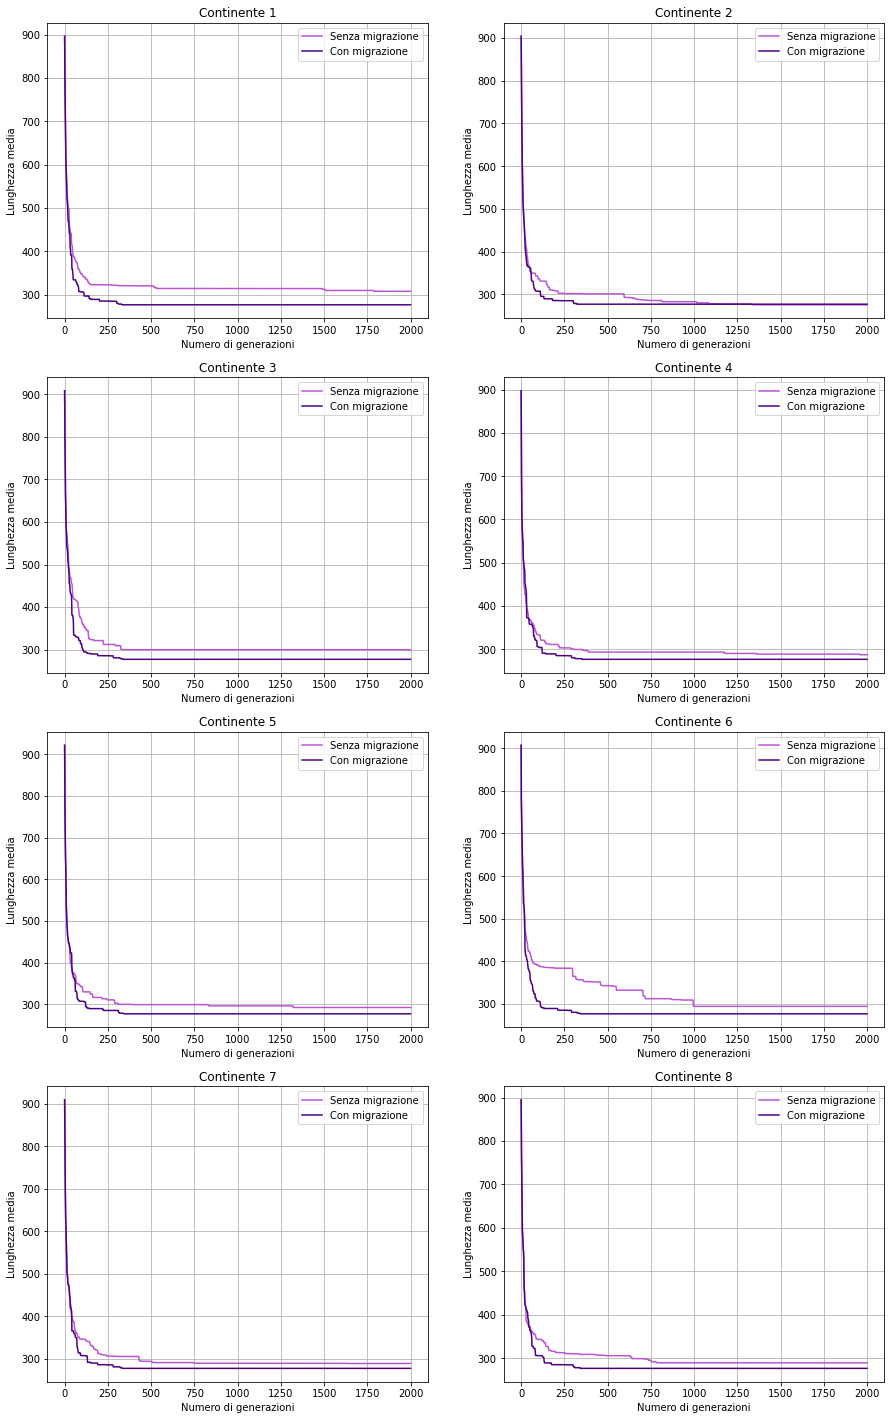

In [54]:
################################ Average lengths graphs

name_nomig = ["Es10/AverageLengths_nomig_0", "Es10/AverageLengths_nomig_1", "Es10/AverageLengths_nomig_2", "Es10/AverageLengths_nomig_3", 
        "Es10/AverageLengths_nomig_4", "Es10/AverageLengths_nomig_5", "Es10/AverageLengths_nomig_6", "Es10/AverageLengths_nomig_7"]

name_mig = ["Es10/AverageLengths_mig_0", "Es10/AverageLengths_mig_1", "Es10/AverageLengths_mig_2", "Es10/AverageLengths_mig_3", 
        "Es10/AverageLengths_mig_4", "Es10/AverageLengths_mig_5", "Es10/AverageLengths_mig_6", "Es10/AverageLengths_mig_7"]

fig, axes = plt.subplots(4, 2, figsize=(15, 25))

for i in range(8): 
    
    ax = axes[ i//2, i%2 ]
    
    data_nomig = np.loadtxt( name_nomig[i] )
    data_mig = np.loadtxt( name_mig[i] )
    
    ax.plot(data_nomig[:,0], data_nomig[:,1], color="mediumorchid", label="Senza migrazione")
    ax.plot(data_mig[:,0], data_mig[:,1], color="indigo", label="Con migrazione")
    
    ax.set_title("Continente " + str(i+1))
    ax.set_xlabel("Numero di generazioni")
    ax.set_ylabel("Lunghezza media")
    ax.legend()
    ax.grid(True)
    
plt.show()